In [1]:
import numpy as np 
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pprint as pp
from nltk.corpus import stopwords

In [43]:
train_df = pd.read_csv('PS1.1A_training_data.txt',sep="\t", names=["ID","TEXT","Sentiment","Topic","Genre"])

train_df.head(5)

,ID,TEXT,Sentiment,Topic,Genre
0,0,This is definitely a must have if your state d...,POSITIVE,NONE,GENRE_B
1,1,It's a great place and I highly recommend it.,POSITIVE,NONE,GENRE_B
2,2,"I will see the doctors, take some blood tests ...",NEUTRAL,GOING_TO_PLACES,GENRE_A
3,3,I can tell you about having my phone and elect...,NEGATIVE,MONEY_ISSUE,GENRE_A
4,4,Their steaks are 100% recommended!,POSITIVE,NONE,GENRE_B


In [44]:
train_df = train_df[train_df.Sentiment != 'NEUTRAL']

In [45]:
train_df['TEXT'] = train_df['TEXT'].str.lower()

In [46]:
train_df.head(5)

,ID,TEXT,Sentiment,Topic,Genre
0,0,this is definitely a must have if your state d...,POSITIVE,NONE,GENRE_B
1,1,it's a great place and i highly recommend it.,POSITIVE,NONE,GENRE_B
3,3,i can tell you about having my phone and elect...,NEGATIVE,MONEY_ISSUE,GENRE_A
4,4,their steaks are 100% recommended!,POSITIVE,NONE,GENRE_B
5,5,"i was billed for thousands of dollars he said,...",NEGATIVE,MONEY_ISSUE,GENRE_A


In [47]:
train_df

,ID,TEXT,Sentiment,Topic,Genre
0,0,this is definitely a must have if your state d...,POSITIVE,NONE,GENRE_B
1,1,it's a great place and i highly recommend it.,POSITIVE,NONE,GENRE_B
3,3,i can tell you about having my phone and elect...,NEGATIVE,MONEY_ISSUE,GENRE_A
4,4,their steaks are 100% recommended!,POSITIVE,NONE,GENRE_B
5,5,"i was billed for thousands of dollars he said,...",NEGATIVE,MONEY_ISSUE,GENRE_A
...,...,...,...,...,...
2553,2559,this is one of the better buffets that i have ...,POSITIVE,NONE,GENRE_B
2554,2560,there's no elegant way to say i was fired.,NEGATIVE,MONEY_ISSUE,GENRE_A
2555,2561,"that's why we go pay our bucks for the movies,...",POSITIVE,ATTENDING_EVENT,GENRE_A
2556,2562,"however, after finally watching this film, i r...",POSITIVE,NONE,GENRE_B


In [48]:
train_df.describe()

,ID
count,2354.000000
mean,1279.099405
std,741.538790
min,0.000000
25%,634.250000
50%,1273.500000
75%,1922.750000
max,2563.000000


In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2557
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         2354 non-null   int64 
 1   TEXT       2354 non-null   object
 2   Sentiment  2354 non-null   object
 3   Topic      2354 non-null   object
 4   Genre      2354 non-null   object
dtypes: int64(1), object(4)
memory usage: 110.3+ KB


In [50]:
train_df['Sentiment'].value_counts()

NEGATIVE    1281
POSITIVE    1073
Name: Sentiment, dtype: int64

<AxesSubplot:>

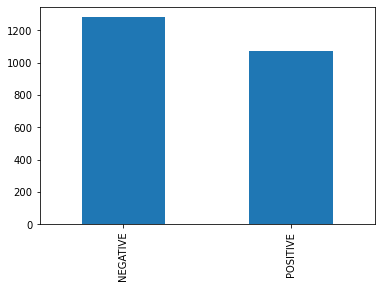

In [51]:
train_df['Sentiment'].value_counts().plot(kind = 'bar')

In [98]:
test_df = pd.read_csv('PS1.1A_test_data.txt',sep="\t", names=["ID","TEXT","Sentiment","Topic","Genre"])

In [99]:
test_df.head(5)

,ID,TEXT,Sentiment,Topic,Genre
0,0,The reception through this headset is excellent.,POSITIVE,NONE,GENRE_B
1,1,Hands down my favorite Italian restaurant!,POSITIVE,NONE,GENRE_B
2,2,The bathrooms are clean and the place itself i...,POSITIVE,NONE,GENRE_B
3,3,If you haven't gone here GO NOW!,POSITIVE,NONE,GENRE_B
4,4,"Host staff were, for lack of a better word, BI...",NEGATIVE,NONE,GENRE_B


In [100]:
test_df = test_df.rename(columns={"Context":"Topic"})
test_df.head(5)

,ID,TEXT,Sentiment,Topic,Genre
0,0,The reception through this headset is excellent.,POSITIVE,NONE,GENRE_B
1,1,Hands down my favorite Italian restaurant!,POSITIVE,NONE,GENRE_B
2,2,The bathrooms are clean and the place itself i...,POSITIVE,NONE,GENRE_B
3,3,If you haven't gone here GO NOW!,POSITIVE,NONE,GENRE_B
4,4,"Host staff were, for lack of a better word, BI...",NEGATIVE,NONE,GENRE_B


In [101]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         1929 non-null   int64 
 1   TEXT       1929 non-null   object
 2   Sentiment  1929 non-null   object
 3   Topic      1929 non-null   object
 4   Genre      1929 non-null   object
dtypes: int64(1), object(4)
memory usage: 75.5+ KB


In [102]:
test_df = test_df[test_df.Sentiment != 'NEUTRAL']

In [103]:
test_df['TEXT'] = test_df['TEXT'].str.lower()

In [104]:
test_df.head(5)

,ID,TEXT,Sentiment,Topic,Genre
0,0,the reception through this headset is excellent.,POSITIVE,NONE,GENRE_B
1,1,hands down my favorite italian restaurant!,POSITIVE,NONE,GENRE_B
2,2,the bathrooms are clean and the place itself i...,POSITIVE,NONE,GENRE_B
3,3,if you haven't gone here go now!,POSITIVE,NONE,GENRE_B
4,4,"host staff were, for lack of a better word, bi...",NEGATIVE,NONE,GENRE_B


In [105]:
test_df.describe()

,ID
count,1866.000000
mean,1003.615756
std,592.239970
min,0.000000
25%,501.250000
50%,998.500000
75%,1479.750000
max,2086.000000


In [106]:
test_df['Sentiment'].value_counts()

NEGATIVE    949
POSITIVE    917
Name: Sentiment, dtype: int64

<AxesSubplot:>

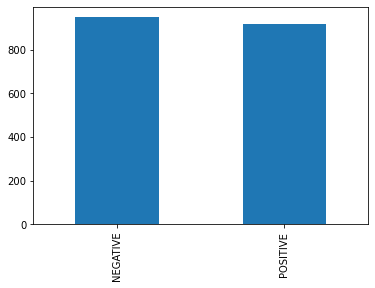

In [107]:
test_df['Sentiment'].value_counts().plot(kind = 'bar')

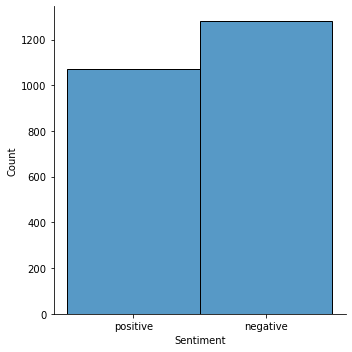

In [108]:
sns.displot(train_df,x='Sentiment',bins=10,binwidth=3)

In [109]:
wordcloud = WordCloud(max_font_size=50, max_words=10000, background_color="black").generate(' '.join(train_df['TEXT']))

<function matplotlib.pyplot.show(close=None, block=None)>

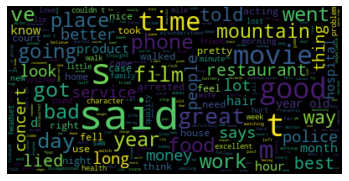

In [110]:
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show

In [111]:
result = set()
train_df['TEXT'].str.split().apply(result.update)
print(len(result))

6075


In [112]:
## TEXTPREPROCESSING

In [113]:
train_df.columns

Index(['ID', 'TEXT', 'Sentiment', 'Topic', 'Genre'], dtype='object')

In [114]:
def clean_TEXT(dataframe):
    dataframe['TEXT'] = dataframe.TEXT.fillna('none')
    dataframe['Sentiment'] = dataframe.Sentiment.fillna('none')
    #dataframe['Topic'] = dataframe.Topic.fillna('none')
    dataframe['Genre'] = dataframe.Genre.fillna('none')
    
    columns = list(dataframe.columns)
    
    for column in columns:
        if column != 'ID':
            dataframe[column] = dataframe[column].str.replace(r'\W', ' ').str.replace(r'\s$','')
            
    
    for column in columns:
        dataframe = remove_stop_words(dataframe,column)
    
    for column in columns:
        dataframe = remove_special_characters(dataframe,column)
    
    return dataframe

        
def remove_stop_words(data_frame, column_name):
    if column_name != 'ID':
        data_frame[column_name] = data_frame[column_name].apply(lambda x: " ".join([i for i in x.lower().split() if i not in STOPWORDS]))
    return data_frame

def remove_special_characters(data_frame, columns):
    data_frame.columns = data_frame.columns.str.replace('[!,@,#,$,%,^,&,*,\",:,;,.]','')
    return data_frame

In [115]:
train_df = clean_TEXT(train_df)

train_df.head(5)

,ID,TEXT,Sentiment,Topic,Genre
0,0,definitely state allow cell phone usage driving,positive,,genre_b
1,1,s great place highly recommend,positive,,genre_b
3,3,tell having phone electricity gas cut couldn t...,negative,money_issue,genre_a
4,4,steaks 100 recommended,positive,,genre_b
5,5,billed thousands dollars said feeling shock un...,negative,money_issue,genre_a


In [116]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_selection import SelectKBest,chi2

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)

text_counts = cv.fit_transform(train_df['TEXT'])



In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts,train_df['Sentiment'], test_size=0.25, random_state=5)
#print(X_train,y_train)

In [118]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=1, class_prior=None, fit_prior=True)
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1)

In [119]:
#print(X_test,y_test)

In [120]:
from sklearn import metrics

predictions = mnb.predict(X_test)
accuracy = metrics.accuracy_score(predictions, y_test)

print(accuracy)

0.765704584040747


In [121]:
## TEST DATASET

test_df = clean_TEXT(test_df)
test_df.head(5)



,ID,TEXT,Sentiment,Topic,Genre
0,0,reception headset excellent,positive,,genre_b
1,1,hands favorite italian restaurant,positive,,genre_b
2,2,bathrooms clean place decorated,positive,,genre_b
3,3,haven t gone,positive,,genre_b
4,4,host staff lack better word bitches,negative,,genre_b


In [122]:
test_token = RegexpTokenizer(r'[a-zA-Z0-9]+')

test_cv = CountVectorizer(stop_words='english',ngram_range=(1,1),tokenizer=test_token.tokenize,vocabulary=cv.vocabulary_)

test_text_counts = test_cv.transform(test_df['TEXT'])

print(test_text_counts.shape, text_counts.shape)
print(type(test_text_counts))

(1866, 6077) (2354, 6077)
<class 'scipy.sparse.csr.csr_matrix'>


In [123]:
test_X_train, test_X_test, test_y_train, test_y_test = train_test_split(test_text_counts,test_df['Sentiment'], test_size=0.25, random_state=5)
print(test_df['Sentiment'].shape)

(1866,)


In [129]:

predictions = mnb.predict(test_text_counts)
accuracy = metrics.accuracy_score(predictions,test_df['Sentiment'])

print(accuracy)

0.7470525187566989


In [125]:
## CROSS VALIDATION

In [126]:
from sklearn.model_selection import cross_val_score,ShuffleSplit

mnb_cross_val = MultinomialNB(alpha=1, class_prior=None, fit_prior=True)
scores = cross_val_score(mnb_cross_val,X_train,y_train, cv=5)
print(scores)


[0.79603399 0.73654391 0.76203966 0.79320113 0.73937677]


In [127]:
print(scores.mean(), scores.std())

0.7654390934844192 0.025426408693843484


In [128]:
## SHUFFLE SPLIT

shuffle = ShuffleSplit(n_splits=5,test_size=0.25,random_state=0)
cross_val_score(mnb_cross_val,X_train,y_train,cv=shuffle)

array([0.77149321, 0.75565611, 0.78280543, 0.74660633, 0.77149321])